In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def import_data(detector:str, mass_ratio):
    """Import data computed from scr/rayleigh_criterion_two_modes.py
    
    Parameters
    ----------
    detector : str
        Gravitational wave detector name. Must be {'LIGO', 'LISA',
        'CE' = 'CE2silicon', 'CE2silica', 'ET'}.
    mass_ratio : TYPE
        Binary black hole mass ratio. mass_ratio >= 1. This is used to
        determine the QNM parameters.
    
    Returns
    -------
    Pandas DataFrame
        Return DataFrame with the data
    """
    columns = ('mass',
               'redshift',
               'mode_0',
               'mode_1',
               'freq_0',
               'sigma_freq_0',
               'freq_1',
               'sigma_freq_1',
               'tau_0',
               'sigma_tau_0',
               'tau_1',
               'sigma_tau_1',
               'A',
               'R',
              )

    df = pd.read_csv(f'../data/parameters_dependence_errors/{detector}_q_{mass_ratio}_amplitude_and_ratio.dat', delimiter = "\t", comment="#", names=columns)
    df['mass_ratio'] = [mass_ratio]*len(df.mass)
    
    return df

In [4]:
# import all data
detectors = ["LIGO"]#, "ET", "CE", "LISA"]
df = pd.DataFrame()

for q in [1.5, 10]:
    for detector in detectors:
        df = df.append(import_data(detector, q))
df


,mass,redshift,mode_0,mode_1,freq_0,sigma_freq_0,freq_1,sigma_freq_1,tau_0,sigma_tau_0,tau_1,sigma_tau_1,A,R,mass_ratio
0,500,0.1,"(2,2,0)","(2,2,1) II",30.400828,0.483785,29.666911,9.978114,0.033025,0.008233,0.010915,0.012043,0.200631,0.345222,1.5
1,500,0.1,"(2,2,0)","(2,2,1) II",30.400828,0.369204,29.666911,2.186450,0.033025,0.006283,0.010915,0.002639,0.262896,1.202323,1.5
2,500,0.1,"(2,2,0)","(2,2,1) II",30.400828,0.318858,29.666911,5.449087,0.033025,0.005426,0.010915,0.006577,0.304406,0.416647,1.5
3,500,0.1,"(2,2,0)","(2,2,1) II",30.400828,0.298505,29.666911,3.026179,0.033025,0.005080,0.010915,0.003652,0.325161,0.702347,1.5
4,500,0.1,"(2,2,0)","(2,2,1) II",30.400828,0.400850,29.666911,3.113764,0.033025,0.006822,0.010915,0.003758,0.242141,0.916623,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,500,0.1,"(2,2,0)","(2,2,1) II",24.224829,0.691226,22.935250,20.824583,0.030791,0.009184,0.010067,0.016050,0.278846,0.281538,10.0
896,500,0.1,"(2,2,0)","(2,2,1) II",24.224829,0.728929,22.935250,7.843025,0.030791,0.009684,0.010067,0.006045,0.264423,0.788305,10.0
897,500,0.1,"(2,2,0)","(2,2,1) II",24.224829,0.728929,22.935250,7.610063,0.030791,0.009684,0.010067,0.005865,0.264423,0.812437,10.0
898,500,0.1,"(2,2,0)","(2,2,1) II",24.224829,0.691226,22.935250,19.180537,0.030791,0.009184,0.010067,0.014783,0.278846,0.305669,10.0


Text(0, 0.5, 'R')

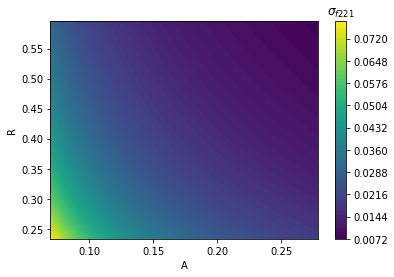

In [19]:
df_plot = df[(df.mass_ratio == 10)&(df.A < 0.4)&(df.R < 0.6)]

plt.tricontourf(df_plot.A, df_plot.R, df_plot.sigma_tau_1, levels = 100)
# plt.scatter(df_plot.A, df_plot.R, c = df_plot.sigma_freq_1)

clb = plt.colorbar()
clb.ax.set_title(r'$\sigma_{f221}$')
plt.xlabel('A')
plt.ylabel('R')